In [1]:
# Initial imports
import pandas as pd
from pathlib import Path
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
%matplotlib inline

# Needed for decision tree visualization
import pydotplus
from IPython.display import Image

In [2]:
# loading data
csvpath = Path("C:\\Users\\willu\\Documents\\NBA-ML-Project\\combined_df.csv")
teamstats_df = pd.read_csv(csvpath)
pd.set_option("display.max_columns", 110)
teamstats_df = teamstats_df.set_index('GAMEDATE')
teamstats_df

,Unnamed: 0,H_TEAM,H_TEAM1,H_H/A,H_TEAM2,H_W/L,H_MIN,H_PTS,H_FGM,H_FGA,H_FG%,H_3PM,H_3PA,H_3P%,H_FTM,H_FTA,H_FT%,H_OREB,H_DREB,H_REB,H_AST,H_TOV,H_STL,H_BLK,H_PF,H_+/-,A_TEAM,A_TEAM1,A_H/A,A_TEAM2,GAMEDATE.1,A_W/L,A_MIN,A_PTS,A_FGM,A_FGA,A_FG%,A_3PM,A_3PA,A_3P%,A_FTM,A_FTA,A_FT%,A_OREB,A_DREB,A_REB,A_AST,A_TOV,A_STL,A_BLK,A_PF,A_+/-
GAMEDATE,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-01-01,0,ATL,ATL,vs,SAS,W,53,114,42,92,45.7,14,28,50.0,16,27,59.3,11,35,46,25,12,6,6,21,2,SAS,SAS,@,ATL,2017-01-01,L,53,112,42,90,46.7,9,27,33.3,19,22,86.4,9,38,47,27,12,5,6,21,-2
2014-01-03,1,ATL,ATL,vs,GSW,L,48,100,37,80,46.3,10,31,32.3,16,19,84.2,7,34,41,23,20,15,4,19,-1,GSW,GSW,@,ATL,2014-01-03,W,48,101,39,87,44.8,6,27,22.2,17,25,68.0,13,34,47,30,21,15,7,17,1
2020-01-04,2,ATL,ATL,vs,IND,W,48,116,42,82,51.2,10,32,31.3,22,24,91.7,4,36,40,22,14,8,4,28,5,IND,IND,@,ATL,2020-01-04,L,48,111,36,87,41.4,10,27,37.0,29,35,82.9,13,26,39,24,11,8,4,24,-5
2012-01-05,3,ATL,ATL,vs,MIA,L,63,109,36,94,38.3,6,22,27.3,31,46,67.4,15,36,51,22,19,10,5,24,-7,MIA,MIA,@,ATL,2012-01-05,W,63,116,45,102,44.1,8,28,28.6,18,23,78.3,14,42,56,25,22,6,6,35,7
2013-01-05,4,ATL,ATL,vs,BOS,L,48,81,28,68,41.2,10,29,34.5,15,19,78.9,8,28,36,18,21,8,4,19,-8,BOS,BOS,@,ATL,2013-01-05,W,48,89,39,85,45.9,3,16,18.8,8,12,66.7,16,28,44,27,13,11,4,15,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-03-30,12733,WAS,WAS,vs,CHA,L,48,104,41,100,41.0,10,37,27.0,12,15,80.0,15,36,51,22,13,5,1,19,-10,CHA,CHA,@,WAS,2021-03-30,W,48,114,42,90,46.7,14,34,41.2,16,19,84.2,9,41,50,24,14,6,6,17,10
2021-03-04,12734,WAS,WAS,vs,LAC,W,48,119,40,88,45.5,9,23,39.1,30,42,71.4,11,30,41,20,9,12,3,24,2,LAC,LAC,@,WAS,2021-03-04,L,48,117,38,82,46.3,16,35,45.7,25,27,92.6,10,35,45,24,19,4,4,31,-2
2021-04-16,12735,WAS,WAS,vs,NOP,W,53,117,45,96,46.9,4,27,14.8,23,32,71.9,3,43,46,24,13,5,7,24,2,NOP,NOP,@,WAS,2021-04-16,L,53,115,40,97,41.2,7,28,25.0,28,33,84.8,11,45,56,26,16,11,7,22,-2


In [3]:
was= teamstats_df.loc[teamstats_df['H_TEAM']=='WAS']
was4 = was[was['H_TEAM2']=='LAL']

dal = teamstats_df.loc[teamstats_df['H_TEAM']=='DAL']
dal2 = dal.loc[dal["H_TEAM2"]=='HOU']
was.sort_values('GAMEDATE')

was2 = teamstats_df.iloc[12314:]
was2.head(30)

,Unnamed: 0,H_TEAM,H_TEAM1,H_H/A,H_TEAM2,H_W/L,H_MIN,H_PTS,H_FGM,H_FGA,H_FG%,H_3PM,H_3PA,H_3P%,H_FTM,H_FTA,H_FT%,H_OREB,H_DREB,H_REB,H_AST,H_TOV,H_STL,H_BLK,H_PF,H_+/-,A_TEAM,A_TEAM1,A_H/A,A_TEAM2,GAMEDATE.1,A_W/L,A_MIN,A_PTS,A_FGM,A_FGA,A_FG%,A_3PM,A_3PA,A_3P%,A_FTM,A_FTA,A_FT%,A_OREB,A_DREB,A_REB,A_AST,A_TOV,A_STL,A_BLK,A_PF,A_+/-
GAMEDATE,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2012-01-01,12314,WAS,WAS,vs,BOS,L,48,86,32,78,41.0,2,16,12.5,20,23,87.0,10,29,39,15,14,9,8,21,-8,BOS,BOS,@,WAS,2012-01-01,W,48,94,37,74,50.0,5,12,41.7,15,23,65.2,8,33,41,26,16,7,5,20,8
2013-01-01,12315,WAS,WAS,vs,DAL,L,48,94,32,79,40.5,10,26,38.5,20,26,76.9,12,32,44,23,15,3,4,23,-9,DAL,DAL,@,WAS,2013-01-01,W,48,103,41,82,50.0,10,22,45.5,11,17,64.7,8,34,42,25,12,6,4,25,9
2014-01-01,12316,WAS,WAS,vs,DAL,L,48,78,33,88,37.5,5,24,20.8,7,10,70.0,15,31,46,17,19,9,6,21,-9,DAL,DAL,@,WAS,2014-01-01,W,48,87,30,78,38.5,6,24,25.0,21,23,91.3,12,32,44,18,15,12,3,12,9
2016-01-01,12317,WAS,WAS,vs,ORL,W,48,103,43,92,46.7,8,26,30.8,9,10,90.0,12,34,46,25,10,11,5,11,12,ORL,ORL,@,WAS,2016-01-01,L,48,91,40,85,47.1,5,20,25.0,6,8,75.0,7,32,39,29,16,6,4,13,-12
2020-01-01,12318,WAS,WAS,vs,ORL,L,48,101,33,87,37.9,9,31,29.0,26,31,83.9,9,37,46,18,13,5,4,23,-21,ORL,ORL,@,WAS,2020-01-01,W,48,122,45,95,47.4,12,32,37.5,20,27,74.1,11,41,52,25,9,11,6,21,21
2019-01-02,12319,WAS,WAS,vs,ATL,W,48,114,43,92,46.7,11,29,37.9,17,23,73.9,10,38,48,29,10,10,2,20,16,ATL,ATL,@,WAS,2019-01-02,L,48,98,40,95,42.1,10,31,32.3,8,13,61.5,13,37,50,26,14,5,6,19,-16
2014-01-03,12320,WAS,WAS,vs,TOR,L,48,88,34,82,41.5,4,12,33.3,16,17,94.1,16,26,42,19,18,7,2,14,-13,TOR,TOR,@,WAS,2014-01-03,W,48,101,40,79,50.6,11,22,50.0,10,13,76.9,10,23,33,29,13,8,4,20,13
2016-01-03,12321,WAS,WAS,vs,MIA,L,48,75,31,91,34.1,4,30,13.3,9,13,69.2,11,34,45,19,11,5,2,12,-22,MIA,MIA,@,WAS,2016-01-03,W,48,97,39,86,45.3,9,23,39.1,10,12,83.3,9,45,54,27,13,8,11,15,22
2018-01-03,12322,WAS,WAS,vs,NYK,W,48,121,48,81,59.3,9,23,39.1,16,26,61.5,6,36,42,27,13,9,5,21,18,NYK,NYK,@,WAS,2018-01-03,L,48,103,41,86,47.7,7,19,36.8,14,18,77.8,8,28,36,19,14,7,5,20,-18


In [4]:
dal['H_H/A'] = dal['H_H/A'].apply(lambda x: 1 if x=="vs" else 0)
dal['A_H/A'] = dal['A_H/A'].apply(lambda x: 1 if x=="vs" else 0)

dal['H_W/L']=dal['H_W/L'].apply(lambda x: 1 if x=="W" else 0)
dal['A_W/L']=dal['A_W/L'].apply(lambda x: 1 if x=="W" else 0)

was2['H_H/A'] = was2['H_H/A'].apply(lambda x: 1 if x=="vs" else 0)
was2['A_H/A'] = was2['A_H/A'].apply(lambda x: 1 if x=="vs" else 0)

was2['H_W/L']=was2['H_W/L'].apply(lambda x: 1 if x=="W" else 0)
was2['A_W/L']=was2['A_W/L'].apply(lambda x: 1 if x=="W" else 0)

C:\Users\willu\anaconda3\envs\dev\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\willu\anaconda3\envs\dev\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\willu\anaconda3\envs\dev\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value 

In [5]:
dal = dal.drop(columns=['Unnamed: 0',
                                          'H_TEAM',
                                          'A_TEAM',
                                          'H_TEAM1',
                                          'H_TEAM2',
                                          'A_TEAM1',
                                          'A_TEAM2',
                                          'GAMEDATE.1',
                                          'A_H/A',
                                          'H_+/-',
                                          'A_+/-',
                                          'H_PTS',
                                          'A_PTS',
                                          'A_W/L',
                                         'H_FGM',
                                         'A_FGM',
                                         'H_REB',
                                         'A_REB',
                                         'H_FTM',
                                         'A_FTM',
                                         'H_FTA',
                                         'A_FTA'])
was3 =was2.drop(columns=['Unnamed: 0',
                                          'H_TEAM',
                                          'A_TEAM',
                                          'H_TEAM1',
                                          'H_TEAM2',
                                          'A_TEAM1',
                                          'A_TEAM2',
                                          'GAMEDATE.1',
                                          'A_H/A',
                                          'H_+/-',
                                          'A_+/-',
                                          'H_PTS',
                                          'A_PTS',
                                          'A_W/L',
                                         'H_FGM',
                                         'A_FGM',
                                         'H_REB',
                                         'A_REB',
                                         'H_FTM',
                                         'A_FTM',
                                         'H_FTA',
                                         'A_FTA'])

In [6]:
X2 = dal.copy()
X2.drop('H_W/L', axis=1, inplace=True)
X2

,H_H/A,H_MIN,H_FGA,H_FG%,H_3PM,H_3PA,H_3P%,H_FT%,H_OREB,H_DREB,H_AST,H_TOV,H_STL,H_BLK,H_PF,A_MIN,A_FGA,A_FG%,A_3PM,A_3PA,A_3P%,A_FT%,A_OREB,A_DREB,A_AST,A_TOV,A_STL,A_BLK,A_PF
GAMEDATE,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2012-01-02,1,48,80,48.8,5,16,31.3,85.0,11,30,21,12,8,4,23,48,77,40.3,5,19,26.3,76.9,12,29,12,14,6,5,17
2016-01-02,1,48,83,43.4,10,26,38.5,84.2,3,30,20,13,10,2,17,48,83,48.2,6,20,30.0,79.2,9,44,19,19,8,2,19
2020-01-02,1,48,89,50.6,18,38,47.4,88.2,12,34,22,14,4,8,21,48,91,46.2,12,37,32.4,88.2,12,32,29,12,5,1,21
2014-01-03,1,48,88,51.1,12,28,42.9,71.4,11,28,29,12,8,1,25,48,82,48.8,9,23,39.1,78.9,13,33,21,10,5,4,16
2017-01-03,1,48,78,47.4,17,32,53.1,91.7,2,40,20,15,4,3,21,48,92,44.6,11,30,36.7,85.7,5,33,27,10,6,7,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-12,1,48,83,42.2,9,36,25.0,80.0,11,35,16,15,7,3,24,48,80,48.8,12,31,38.7,69.7,6,34,24,9,9,4,20
2021-04-16,1,48,91,44.0,15,45,33.3,73.7,10,31,30,9,6,7,17,48,86,51.2,14,28,50.0,71.4,9,36,22,10,4,5,20
2021-04-18,1,48,87,44.8,16,48,33.3,65.0,10,32,15,14,3,8,20,48,89,49.4,11,24,45.8,88.0,10,32,22,8,11,3,19


In [7]:
y2=dal['H_W/L'].ravel()

In [8]:
# X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, random_state=78)

In [9]:
# rf_model = RandomForestClassifier(n_estimators=30, random_state=78)

In [10]:
# rf_model = rf_model.fit(X2_train, y2_train)

In [11]:
# predictions2 = rf_model.predict(X2_test)

In [12]:
# print(classification_report(y2_test, predictions2))

In [13]:
teamstats_df.shape

(12738, 52)

In [14]:
# converting 'H/A' to 0/1's
teamstats_df['H_H/A'] = teamstats_df['H_H/A'].apply(lambda x: 1 if x=="vs" else 0)
teamstats_df['A_H/A'] = teamstats_df['A_H/A'].apply(lambda x: 1 if x=="vs" else 0)
teamstats_df[:5]

,Unnamed: 0,H_TEAM,H_TEAM1,H_H/A,H_TEAM2,H_W/L,H_MIN,H_PTS,H_FGM,H_FGA,H_FG%,H_3PM,H_3PA,H_3P%,H_FTM,H_FTA,H_FT%,H_OREB,H_DREB,H_REB,H_AST,H_TOV,H_STL,H_BLK,H_PF,H_+/-,A_TEAM,A_TEAM1,A_H/A,A_TEAM2,GAMEDATE.1,A_W/L,A_MIN,A_PTS,A_FGM,A_FGA,A_FG%,A_3PM,A_3PA,A_3P%,A_FTM,A_FTA,A_FT%,A_OREB,A_DREB,A_REB,A_AST,A_TOV,A_STL,A_BLK,A_PF,A_+/-
GAMEDATE,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-01-01,0,ATL,ATL,1,SAS,W,53,114,42,92,45.7,14,28,50.0,16,27,59.3,11,35,46,25,12,6,6,21,2,SAS,SAS,0,ATL,2017-01-01,L,53,112,42,90,46.7,9,27,33.3,19,22,86.4,9,38,47,27,12,5,6,21,-2
2014-01-03,1,ATL,ATL,1,GSW,L,48,100,37,80,46.3,10,31,32.3,16,19,84.2,7,34,41,23,20,15,4,19,-1,GSW,GSW,0,ATL,2014-01-03,W,48,101,39,87,44.8,6,27,22.2,17,25,68.0,13,34,47,30,21,15,7,17,1
2020-01-04,2,ATL,ATL,1,IND,W,48,116,42,82,51.2,10,32,31.3,22,24,91.7,4,36,40,22,14,8,4,28,5,IND,IND,0,ATL,2020-01-04,L,48,111,36,87,41.4,10,27,37.0,29,35,82.9,13,26,39,24,11,8,4,24,-5
2012-01-05,3,ATL,ATL,1,MIA,L,63,109,36,94,38.3,6,22,27.3,31,46,67.4,15,36,51,22,19,10,5,24,-7,MIA,MIA,0,ATL,2012-01-05,W,63,116,45,102,44.1,8,28,28.6,18,23,78.3,14,42,56,25,22,6,6,35,7
2013-01-05,4,ATL,ATL,1,BOS,L,48,81,28,68,41.2,10,29,34.5,15,19,78.9,8,28,36,18,21,8,4,19,-8,BOS,BOS,0,ATL,2013-01-05,W,48,89,39,85,45.9,3,16,18.8,8,12,66.7,16,28,44,27,13,11,4,15,8


In [15]:
# converting 'W/L' to 0/1's
teamstats_df['H_W/L']=teamstats_df['H_W/L'].apply(lambda x: 1 if x=="W" else 0)
teamstats_df['A_W/L']=teamstats_df['A_W/L'].apply(lambda x: 1 if x=="W" else 0)
teamstats_df[:5]

,Unnamed: 0,H_TEAM,H_TEAM1,H_H/A,H_TEAM2,H_W/L,H_MIN,H_PTS,H_FGM,H_FGA,H_FG%,H_3PM,H_3PA,H_3P%,H_FTM,H_FTA,H_FT%,H_OREB,H_DREB,H_REB,H_AST,H_TOV,H_STL,H_BLK,H_PF,H_+/-,A_TEAM,A_TEAM1,A_H/A,A_TEAM2,GAMEDATE.1,A_W/L,A_MIN,A_PTS,A_FGM,A_FGA,A_FG%,A_3PM,A_3PA,A_3P%,A_FTM,A_FTA,A_FT%,A_OREB,A_DREB,A_REB,A_AST,A_TOV,A_STL,A_BLK,A_PF,A_+/-
GAMEDATE,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-01-01,0,ATL,ATL,1,SAS,1,53,114,42,92,45.7,14,28,50.0,16,27,59.3,11,35,46,25,12,6,6,21,2,SAS,SAS,0,ATL,2017-01-01,0,53,112,42,90,46.7,9,27,33.3,19,22,86.4,9,38,47,27,12,5,6,21,-2
2014-01-03,1,ATL,ATL,1,GSW,0,48,100,37,80,46.3,10,31,32.3,16,19,84.2,7,34,41,23,20,15,4,19,-1,GSW,GSW,0,ATL,2014-01-03,1,48,101,39,87,44.8,6,27,22.2,17,25,68.0,13,34,47,30,21,15,7,17,1
2020-01-04,2,ATL,ATL,1,IND,1,48,116,42,82,51.2,10,32,31.3,22,24,91.7,4,36,40,22,14,8,4,28,5,IND,IND,0,ATL,2020-01-04,0,48,111,36,87,41.4,10,27,37.0,29,35,82.9,13,26,39,24,11,8,4,24,-5
2012-01-05,3,ATL,ATL,1,MIA,0,63,109,36,94,38.3,6,22,27.3,31,46,67.4,15,36,51,22,19,10,5,24,-7,MIA,MIA,0,ATL,2012-01-05,1,63,116,45,102,44.1,8,28,28.6,18,23,78.3,14,42,56,25,22,6,6,35,7
2013-01-05,4,ATL,ATL,1,BOS,0,48,81,28,68,41.2,10,29,34.5,15,19,78.9,8,28,36,18,21,8,4,19,-8,BOS,BOS,0,ATL,2013-01-05,1,48,89,39,85,45.9,3,16,18.8,8,12,66.7,16,28,44,27,13,11,4,15,8


In [16]:
# dropping unneeded columns
# subsequent analysis dropped '+/-' and 'PTS' columns
teamstats_df = teamstats_df.drop(columns=['Unnamed: 0',
                                          'H_TEAM',
                                          'A_TEAM',
                                          'H_TEAM1',
                                          'H_TEAM2',
                                          'A_TEAM1',
                                          'A_TEAM2',
                                          'GAMEDATE.1',
                                          'A_H/A',
                                          'H_+/-',
                                          'A_+/-',
                                          'H_PTS',
                                          'A_PTS',
                                          'A_W/L',
                                         'H_FGM',
                                         'A_FGM',
                                         'H_REB',
                                         'A_REB',
                                         'H_FTM',
                                         'A_FTM',
                                         'H_FTA',
                                         'A_FTA'])

In [17]:
#teamstats_df['H_W/L'].value_counts()

In [18]:
#teamstats_df['A_W/L'].value_counts()

In [19]:
#teamstats_df['GAMEDATE'] = pd.to_datetime(teamstats_df['GAMEDATE'])
#teamstats_df['GAMEDATE.1'] = pd.to_datetime(teamstats_df['GAMEDATE.1'])

In [20]:
#new_teamstats_df = pd.get_dummies(teamstats_df, columns=['TEAM1','TEAM2']).head()


In [21]:
#new_teamstats_df.head()

In [22]:
# defining 'W/L' column as feature set
X = teamstats_df.copy()
X.drop('H_W/L', axis=1, inplace=True)
X.sort_values('GAMEDATE')

,H_H/A,H_MIN,H_FGA,H_FG%,H_3PM,H_3PA,H_3P%,H_FT%,H_OREB,H_DREB,H_AST,H_TOV,H_STL,H_BLK,H_PF,A_MIN,A_FGA,A_FG%,A_3PM,A_3PA,A_3P%,A_FT%,A_OREB,A_DREB,A_AST,A_TOV,A_STL,A_BLK,A_PF
GAMEDATE,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2010-10-26,1,48,69,46.4,8,16,50.0,64.0,8,34,25,20,6,4,19,48,74,36.5,8,20,40.0,72.0,11,28,15,17,10,6,21
2010-10-26,1,48,93,46.2,10,20,50.0,66.7,18,30,31,15,11,2,22,48,74,48.6,9,19,47.4,68.8,7,23,15,19,3,4,19
2010-10-26,1,48,96,41.7,9,21,42.9,82.1,14,30,21,12,11,4,24,48,91,41.8,8,20,40.0,92.9,16,37,25,21,6,7,25
2010-10-27,1,48,92,55.4,8,20,40.0,84.6,14,31,25,13,5,7,30,48,87,47.1,4,16,25.0,80.8,15,24,24,9,9,2,20
2010-10-27,1,48,78,41.0,4,18,22.2,80.9,9,35,17,12,11,10,15,48,93,43.0,2,14,14.3,59.1,15,36,21,15,6,6,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-18,1,48,87,43.7,16,39,41.0,81.0,16,37,28,17,9,1,13,48,82,47.6,17,43,39.5,66.7,8,30,26,11,10,6,17
2021-04-18,1,53,95,47.4,11,29,37.9,87.5,13,36,27,13,9,6,26,53,101,40.6,6,27,22.2,80.0,20,32,25,13,6,4,16
2021-04-18,1,48,91,45.1,11,32,34.4,89.5,9,27,28,15,10,5,19,48,82,51.2,16,34,47.1,70.0,10,33,26,19,7,7,21


In [23]:
was3

,H_H/A,H_W/L,H_MIN,H_FGA,H_FG%,H_3PM,H_3PA,H_3P%,H_FT%,H_OREB,H_DREB,H_AST,H_TOV,H_STL,H_BLK,H_PF,A_MIN,A_FGA,A_FG%,A_3PM,A_3PA,A_3P%,A_FT%,A_OREB,A_DREB,A_AST,A_TOV,A_STL,A_BLK,A_PF
GAMEDATE,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2012-01-01,1,0,48,78,41.0,2,16,12.5,87.0,10,29,15,14,9,8,21,48,74,50.0,5,12,41.7,65.2,8,33,26,16,7,5,20
2013-01-01,1,0,48,79,40.5,10,26,38.5,76.9,12,32,23,15,3,4,23,48,82,50.0,10,22,45.5,64.7,8,34,25,12,6,4,25
2014-01-01,1,0,48,88,37.5,5,24,20.8,70.0,15,31,17,19,9,6,21,48,78,38.5,6,24,25.0,91.3,12,32,18,15,12,3,12
2016-01-01,1,1,48,92,46.7,8,26,30.8,90.0,12,34,25,10,11,5,11,48,85,47.1,5,20,25.0,75.0,7,32,29,16,6,4,13
2020-01-01,1,0,48,87,37.9,9,31,29.0,83.9,9,37,18,13,5,4,23,48,95,47.4,12,32,37.5,74.1,11,41,25,9,11,6,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-03-30,1,0,48,100,41.0,10,37,27.0,80.0,15,36,22,13,5,1,19,48,90,46.7,14,34,41.2,84.2,9,41,24,14,6,6,17
2021-03-04,1,1,48,88,45.5,9,23,39.1,71.4,11,30,20,9,12,3,24,48,82,46.3,16,35,45.7,92.6,10,35,24,19,4,4,31
2021-04-16,1,1,53,96,46.9,4,27,14.8,71.9,3,43,24,13,5,7,24,53,97,41.2,7,28,25.0,84.8,11,45,26,16,11,7,22


In [24]:
teamstats_df.info('include=all')

<class 'pandas.core.frame.DataFrame'>
Index: 12738 entries, 2017-01-01 to 2021-04-03
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   H_H/A   12738 non-null  int64  
 1   H_W/L   12738 non-null  int64  
 2   H_MIN   12738 non-null  int64  
 3   H_FGA   12738 non-null  int64  
 4   H_FG%   12738 non-null  float64
 5   H_3PM   12738 non-null  int64  
 6   H_3PA   12738 non-null  int64  
 7   H_3P%   12738 non-null  float64
 8   H_FT%   12738 non-null  float64
 9   H_OREB  12738 non-null  int64  
 10  H_DREB  12738 non-null  int64  
 11  H_AST   12738 non-null  int64  
 12  H_TOV   12738 non-null  int64  
 13  H_STL   12738 non-null  int64  
 14  H_BLK   12738 non-null  int64  
 15  H_PF    12738 non-null  int64  
 16  A_MIN   12738 non-null  int64  
 17  A_FGA   12738 non-null  int64  
 18  A_FG%   12738 non-null  float64
 19  A_3PM   12738 non-null  int64  
 20  A_3PA   12738 non-null  int64  
 21  A_3P%   12738 non-null  fl

In [25]:
was2X = was3.copy()
was2X.drop('H_W/L', axis=1, inplace=True)

was2y = was3['H_W/L'].ravel()

In [27]:
# defining target vector
y=teamstats_df['H_W/L'].values.reshape(-1,1)
# defining target vector
# y=teamstats_df['H_W/L'].ravel()
y[:5]

array([[1],
       [0],
       [1],
       [0],
       [0]], dtype=int64)

In [28]:
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [29]:
# Creating StandardScaler instance
#scaler = StandardScaler()

# Fitting Standard Scaller
#X_scaler = scaler.fit(X_train)

In [30]:
# Scaling data
#X_train_scaled = X_scaler.transform(X_train)
#X_test_scaled = X_scaler.transform(X_test)

In [31]:
# Create a random forest classifier
rf_model = RandomForestClassifier(n_estimators=30, random_state=78)

In [32]:
# Fitting the model
rf_model = rf_model.fit(X_train, y_train)
#rf_model = rf_model.fit(X_train_scaled, y_train)

C:\Users\willu\anaconda3\envs\dev\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [33]:
# Making predictions using the testing data
predictions = rf_model.predict(was2X)
#predictions = rf_model.predict(X_test_scaled)

In [34]:
# Calculating the confusion matrix
cm = confusion_matrix(was2y, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(was2y, predictions)

In [35]:
 # Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(was2y, predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,186,9
Actual 1,8,221


Accuracy Score : 0.9599056603773585
Classification Report
              precision    recall  f1-score   support

           0       0.96      0.95      0.96       195
           1       0.96      0.97      0.96       229

    accuracy                           0.96       424
   macro avg       0.96      0.96      0.96       424
weighted avg       0.96      0.96      0.96       424



In [36]:
# Random Forests in sklearn will automatically calculate feature importance
importances = rf_model.feature_importances_

In [37]:
# We can sort the features by their importance
sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)

[(0.1379582611635185, 'A_FG%'),
 (0.1360945862605066, 'H_FG%'),
 (0.06650731995102915, 'A_DREB'),
 (0.05959220813020092, 'H_DREB'),
 (0.05385046842827447, 'H_3P%'),
 (0.051442805118168414, 'A_3P%'),
 (0.03990032506866654, 'H_AST'),
 (0.03950007032217855, 'A_AST'),
 (0.0338028851071351, 'A_TOV'),
 (0.031999754197610024, 'H_TOV'),
 (0.029970031431058173, 'A_PF'),
 (0.02714511728646395, 'H_PF'),
 (0.02578370875080416, 'H_STL'),
 (0.0256665203729526, 'H_FT%'),
 (0.024320170071770068, 'A_STL'),
 (0.02414523720019316, 'A_3PM'),
 (0.02368448354235361, 'A_FT%'),
 (0.02135087526215271, 'H_3PM'),
 (0.020168753291892858, 'H_OREB'),
 (0.019355396635691698, 'H_FGA'),
 (0.018914845580875323, 'A_FGA'),
 (0.018750578163859687, 'A_3PA'),
 (0.0185017575211553, 'A_OREB'),
 (0.017009434592652674, 'H_3PA'),
 (0.015297529936132483, 'H_BLK'),
 (0.013782545361911834, 'A_BLK'),
 (0.002780675184351653, 'H_MIN'),
 (0.002723656066439778, 'A_MIN'),
 (0.0, 'H_H/A')]

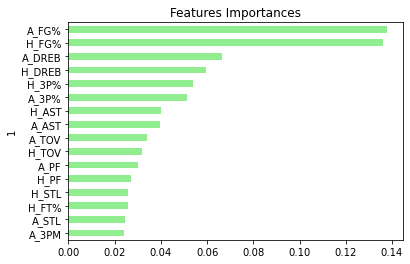

In [38]:
 # Visualize the features by importance
importances_df = pd.DataFrame(sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)[:16])
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='lightgreen', title= 'Features Importances', legend=False)

In [39]:
# def t_vs_t():
#     for g in range(len(predictions)):
#         win_prob = round(predictions2[g],2)
#         HOU = new_teamstats_df.reset_index().drop(columns = 'index').loc[g,'H_TEAM_HOU']
#         POR = new_teamstats_df.reset_index().drop(columns = 'index').loc[g,'A_TEAM_POR']
#         print(f' {HOU} have a probability of {win_prob} of beating {POR}.')
    

In [40]:
# predictions2 = rf_model.predict()

In [41]:
def display2(predictions, was2X):
    for g in range(len(predictions)):
        win_prob = round(predictions[g],2)
        WAS = was2.reset_index().drop(columns = 'GAMEDATE').loc[g,'H_TEAM1']
        DAL = was2.reset_index().drop(columns = 'GAMEDATE').loc[g,'H_TEAM2']
        W_L = was2.reset_index().drop(columns = 'GAMEDATE').loc[g,'H_W/L']
        print(f' {WAS} have a probability of {win_prob} of beating {DAL}: {W_L}.')

In [42]:
import numpy as np
from sklearn.linear_model import LogisticRegression
clf= LogisticRegression()
clf = LogisticRegression(penalty='l1', dual=False, tol=0.001, C=1.0, fit_intercept=True, 
                   intercept_scaling=1, class_weight='balanced', random_state=None, 
                   solver='liblinear', max_iter=1000, multi_class='ovr', verbose=0)

clf.fit(X_train, np.ravel(y_train))
y_pred2 = clf.predict_proba(was2X)
y_pred2 = y_pred2[:,1]

display2(y_pred2,was2X)

 WAS have a probability of 0.0 of beating BOS: 0.
 WAS have a probability of 0.0 of beating DAL: 0.
 WAS have a probability of 0.0 of beating DAL: 0.
 WAS have a probability of 1.0 of beating  ORL: 1.
 WAS have a probability of 0.0 of beating  ORL: 0.
 WAS have a probability of 1.0 of beating  ATL: 1.
 WAS have a probability of 0.0 of beating TOR: 0.
 WAS have a probability of 0.0 of beating  MIA: 0.
 WAS have a probability of 1.0 of beating  NYK: 1.
 WAS have a probability of 0.0 of beating  POR: 0.
 WAS have a probability of 0.64 of beating BKN: 0.
 WAS have a probability of 1.0 of beating  DEN: 1.
 WAS have a probability of 0.0 of beating GSW: 0.
 WAS have a probability of 0.0 of beating NYK: 0.
 WAS have a probability of 0.04 of beating  CLE: 0.
 WAS have a probability of 1.0 of beating  MIN: 1.
 WAS have a probability of 0.01 of beating  MIL: 0.
 WAS have a probability of 1.0 of beating  BOS: 1.
 WAS have a probability of 1.0 of beating NJN: 1.
 WAS have a probability of 0.62 of b

In [43]:
was4

,Unnamed: 0,H_TEAM,H_TEAM1,H_H/A,H_TEAM2,H_W/L,H_MIN,H_PTS,H_FGM,H_FGA,H_FG%,H_3PM,H_3PA,H_3P%,H_FTM,H_FTA,H_FT%,H_OREB,H_DREB,H_REB,H_AST,H_TOV,H_STL,H_BLK,H_PF,H_+/-,A_TEAM,A_TEAM1,A_H/A,A_TEAM2,GAMEDATE.1,A_W/L,A_MIN,A_PTS,A_FGM,A_FGA,A_FG%,A_3PM,A_3PA,A_3P%,A_FTM,A_FTA,A_FT%,A_OREB,A_DREB,A_REB,A_AST,A_TOV,A_STL,A_BLK,A_PF,A_+/-
GAMEDATE,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2012-03-07,12479,WAS,WAS,vs,LAL,W,48,106,43,92,46.7,7,26,26.9,13,19,68.4,17,34,51,24,13,7,7,24,5,LAL,LAL,@,WAS,2012-03-07,L,48,101,32,81,39.5,8,21,38.1,29,37,78.4,9,33,42,21,13,9,6,16,-5
2013-11-26,12638,WAS,WAS,vs,LAL,W,48,116,46,87,52.9,6,21,28.6,18,22,81.8,10,32,42,25,10,15,2,14,5,LAL,LAL,@,WAS,2013-11-26,L,48,111,44,83,53.0,13,28,46.4,10,13,76.9,9,25,34,30,17,4,5,19,-5
2014-12-03,12653,WAS,WAS,vs,LAL,W,48,111,45,93,48.4,6,19,31.6,15,19,78.9,12,41,53,33,11,6,3,15,16,LAL,LAL,@,WAS,2014-12-03,L,48,95,33,85,38.8,12,29,41.4,17,21,81.0,9,34,43,16,13,8,6,20,-16
2010-12-14,12673,WAS,WAS,vs,LAL,L,48,89,37,91,40.7,3,19,15.8,12,16,75.0,19,27,46,19,10,9,4,28,-14,LAL,LAL,@,WAS,2010-12-14,W,48,103,34,75,45.3,6,21,28.6,29,40,72.5,12,33,45,23,12,7,3,19,14
2012-12-14,12674,WAS,WAS,vs,LAL,L,48,96,36,83,43.4,8,21,38.1,16,20,80.0,13,35,48,19,19,6,4,24,-6,LAL,LAL,@,WAS,2012-12-14,W,48,102,37,82,45.1,8,29,27.6,20,28,71.4,13,32,45,18,13,10,6,20,6


In [45]:
# rf_model.predict(was2y)